In [30]:
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import datasets, manifold

In [2]:
categories = [
    'alt.atheism',
    'comp.graphics',
    'rec.sport.baseball',
    'sci.space',
    'talk.politics.guns'
]
train = datasets.fetch_20newsgroups(subset='train', categories=categories)
valid = datasets.fetch_20newsgroups(subset='test', categories=categories)

train.data = np.array(train.data, dtype=np.object)
valid.data = np.array(valid.data, dtype=np.object)

In [3]:
len(train.data), len(train.target), len(valid.data), len(valid.target)

(2800, 2800, 1863, 1863)

In [8]:
for i, c in enumerate(categories):
    indices = np.where(train.target == i)
    print(c + ':\t{}'.format(len(train.data[indices])))

alt.atheism:	480
comp.graphics:	584
rec.sport.baseball:	597
sci.space:	593
talk.politics.guns:	546


In [9]:
# BoW, tf-idf, Word2Vec, SCDV

features_num = 200
min_word_count = 10
context = 5
downsampling = 1e-3
epoch_num = 10

In [10]:
def analyzer(text):
    
    stop_words = ['i', 'a', 'an', 'the', 'to', 'and', 'or', 'if', 'is', 'are', 'am', 'it', 'this', 'that', 'of', 'from', 'in', 'on']
    text = text.lower() # 小文字化
    text = text.replace('\n', '') # 改行削除
    text = text.replace('\t', '') # タブ削除
    text = re.sub(re.compile(r'[!-\/:-@[-`{-~]'), ' ', text) # 記号をスペースに置き換え
    text = text.split(' ') # スペースで区切る
    
    words = []
    for word in text:
        if (re.compile(r'^.*[0-9]+.*$').fullmatch(word) is not None): # 数字が含まれるものは除外
            continue
        if word in stop_words: # ストップワードに含まれるものは除外
            continue
        if len(word) < 2: #  1文字、0文字（空文字）は除外
            continue
        words.append(word)
        
    return words

* BoW

In [14]:
corpus = train.data
count_vectorizer = CountVectorizer(analyzer=analyzer, min_df=min_word_count, binary=True)
bows = count_vectorizer.fit_transform(corpus)

In [15]:
tsne_bow = manifold.TSNE(n_components=2).fit_transform(bows.toarray())

In [28]:
df_tsne_bow = pd.DataFrame({
    'x': tsne_bow[:, 0],
    'y': tsne_bow[:, 1],
    'category': train.target,
})

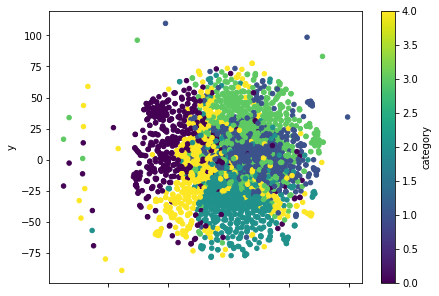

In [29]:
df_tsne_bow.plot.scatter(x='x', y='y', c='category', colormap='viridis', figsize=(7, 5), s=20)
plt.show()

* tf-idf

In [31]:
corpus = train.data
tfidf_vectorizer = TfidfVectorizer(analyzer=analyzer, min_df=min_word_count)
tfidfs = tfidf_vectorizer.fit_transform(corpus)

In [32]:
tsne_tfidf = manifold.TSNE(n_components=2).fit_transform(tfidfs.toarray())

In [33]:
df_tsne_tfidf = pd.DataFrame({
    'x': tsne_tfidf[:, 0],
    'y': tsne_tfidf[:, 1],
    'category': train.target,
})

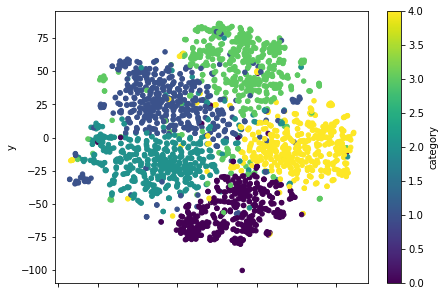

In [34]:
df_tsne_tfidf.plot.scatter(x='x', y='y', c='category', colormap='viridis', figsize=(7, 5), s=20)
plt.show()